In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
collisions = pd.read_csv("/content/drive/My Drive/UofT/Third Year/Fall/MIE368 Project - Group 15/Code/collisions_dataset/collisions_enriched.csv")
speed_cameras = pd.read_csv("/content/drive/My Drive/UofT/Third Year/Fall/MIE368 Project - Group 15/Code/speed_camera_dataset/speed_cameras_clean.csv")

In [ ]:
collisions[['lat', 'lon']].head()

,lat,lon
0,43.701225,-79.377616
1,43.726091,-79.397589
2,43.762676,-79.336644
3,43.703234,-79.346615
4,43.650410,-79.378428


In [ ]:
speed_cameras[['lat', 'lon']].head()

,lat,lon
0,43.713609,-79.567451
1,43.700973,-79.550510
2,43.728553,-79.561386
3,43.748744,-79.597523
4,43.722559,-79.553404


In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine, Unit
import folium
import seaborn as sns
import matplotlib.pyplot as plt

camera_coords = list(zip(speed_cameras['lat'], speed_cameras['lon']))

def nearest_camera_distance(collision_point):
    distances = [haversine(collision_point, cam, unit=Unit.METERS) for cam in camera_coords]
    return min(distances)

collisions['nearest_camera_dist_m'] = collisions.apply(
    lambda row: nearest_camera_distance((row['lat'], row['lon'])),
    axis=1
)

In [ ]:
buffer = 500  # metres
collisions['distance_category'] = collisions['nearest_camera_dist_m'].apply(
    lambda d: 'Near' if d <= buffer else 'Far'
)

/tmp/ipython-input-2321624256.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='distance_category', data=collisions, palette=['green', 'red'])


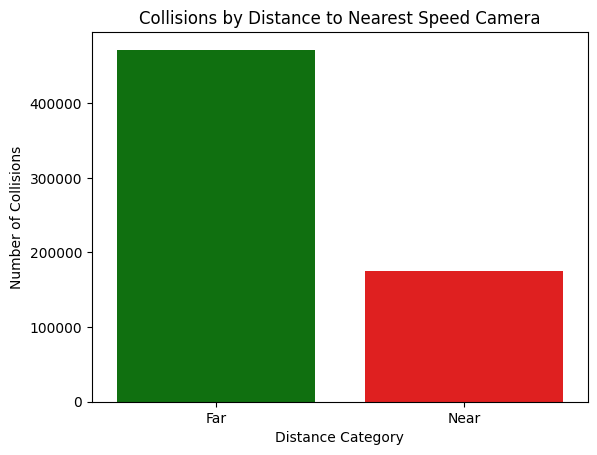

In [ ]:
sns.countplot(x='distance_category', data=collisions, palette=['green', 'red'])
plt.title("Collisions by Distance to Nearest Speed Camera")
plt.xlabel("Distance Category")
plt.ylabel("Number of Collisions")
plt.show()